PHYS 3700 Lab 3 Part 2

Part II Recursive Filters. In this part, you’ll design low-pass, high-pass, band-pass and band-reject filters using recursive equations. It will be easier now to modify your filters for different frequency cutoffs. These filters will run faster than your convolution filters from last week, but keep in mind there is a trade-off that we will look at next week.

1.Using Equations 19-2 to 19-5, 19-7, and 19-8 from our online text design functions for a low-pass, high-pass, band-pass and band-reject recursive filter. Your low and high-pass function should take the input signal and $f_{c}$ in units of the sampling frequency and return the output after applying the filter to the input signal. The band pass and reject filters should take the input signal, centre frequency and bandwidth (both in units of sampling frequency).

Equation 19.2: Single pole low-pass filter. The Filter's response is controlled by the parameter, $x$, a vlue between zero and one.

$$a_{0}= 1-x$$
$$b_{1} = x$$


Equation 19.3: Single pole high-pass filter.
$$a_{0}= (1+x)/2$$
$$a_{1}= -(1+x)/2$$
$$b_{1} = x$$

Equation 19.4: Time constant of single pole filters. This equation relates the amount of decay between samples. $x$, with the filter's time constant, $d$, the number of samples for the filter to decay to 36.8%.
$$x=e^{-1/d}$$

Equation 19.5: Cutoff frequency of single pole filters. The amount of decay between samples, $x$, is related to the cutoff frequency of the filter, $f_{c}$, a value between 0 and 0.5.
$$x=e^{-2\pi f_{c}}$$

Equation 19.7: Band-pass filter. To use these equations, first select the centre frequency, $f$,  and the bandwidth, $BW$. Both of these are expressed as a fraction of the sampling rate, and therefore in the range of 0 to 0.5. Next, calculate $R$, and then $K$, and then the recusrion coefficients. 

$$a_{0}= 1-K$$
$$a_{1}= 2(K-R)cos(2\pi f)$$
$$a_{2}= R^{2}-K$$
$$b_{1} = 2R cos(2\pi f)$$
$$b_{2} = -R^{2}$$

Equation 19.8: Band-reject filter. This filter is commonly called a notch filter. 

$$a_{0}= K$$
$$a_{1}= -2Kcos(2\pi f)$$
$$a_{2}= K$$
$$b_{1} = 2R cos(2\pi f)$$
$$b_{2} = -R^{2}$$

In [5]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
#import seaborn as sns
#import time
#import math
from scipy import signal
from scipy.io import wavfile
import IPython


2.Generate a 500 Hz square wave with scipy.signal.square that lasts 0.01s. Sample at 50,000 Hz and add uniform noise between −0.3 and 0.3. Plot the wave.

In [30]:
f = 500
fs = 50000
t = np.linspace(0, 0.01, fs)

sq_wave = signal.square(2 * np.pi * f * t)
noise = np.random.uniform(-.3,.3,fs)
sq_wave_noisy = sq_wave + noise

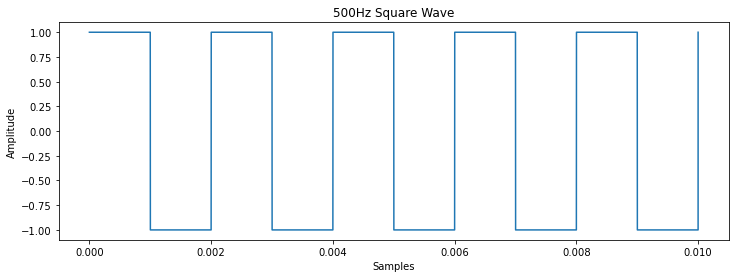

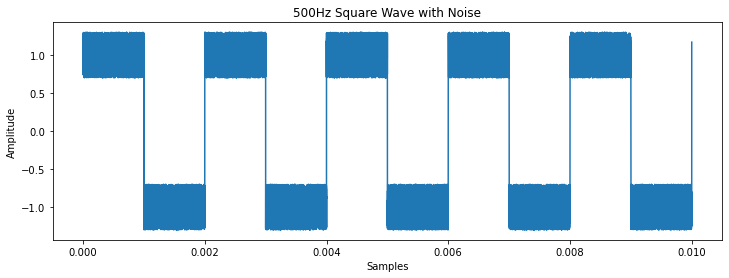

In [31]:
plt.figure(figsize=(12,4))
plt.title('500Hz Square Wave')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(t,sq_wave)
plt.show()

plt.figure(figsize=(12,4))
plt.title('500Hz Square Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(t,sq_wave_noisy)
plt.show()


3.Low-pass filter.

(a) Apply your low-pass recursive filter to your noisy square wave. Choose a cutoff frequency that reduces the noise, but does not distort the shape of the square wave. Print your chosen cutoff frequency directly on a plot of the smoothed wave.

In [32]:
def low_pass_rec(wave, f_c):
    x = np.exp(-2*np.pi*f_c/50000)
    a_0 = 1 - x
    b_1 = x
    y = [a_0*wave[0]]
    i = 1
    while i < len(wave):
        y.append(a_0*wave[i]+b_1*y[i-1])
        i+=1
    return y

Run time: 0.04997 s


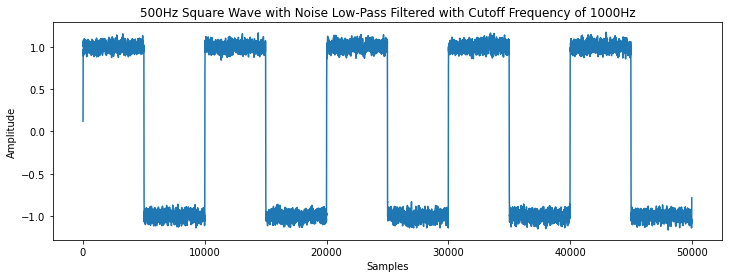

In [33]:
time_start = time.process_time()
sq_wave_noisy_lpr= low_pass_rec(sq_wave_noisy, 1000)

time_elapsed = (time.process_time() - time_start)
print("Run time: %5.5f s" % time_elapsed)

plt.figure(figsize=(12,4))
plt.title('500Hz Square Wave with Noise Low-Pass Filtered with Cutoff Frequency of 1000Hz')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(sq_wave_noisy_lpr)
plt.show()

(b) Again, apply the low-pass recursive filter to your noisy square wave, but this time choose a frequency lower than the cutoff frequency so your wave becomes distorted. You should see that the wave is no longer symmetric. Print your chosen cutoff frequency directly on a plot of the smoothed asymmetric wave.

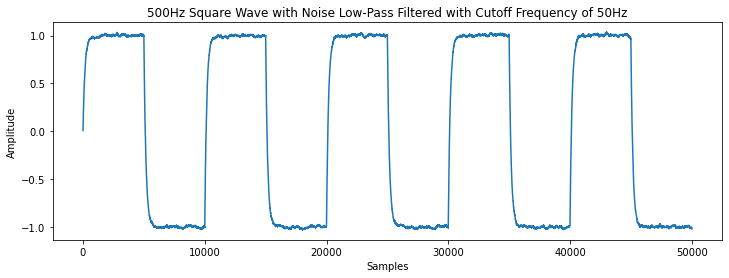

In [34]:
sq_wave_noisy_lpr_1= low_pass_rec(sq_wave_noisy, 50)

plt.figure(figsize=(12,4))
plt.title('500Hz Square Wave with Noise Low-Pass Filtered with Cutoff Frequency of 50Hz')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(sq_wave_noisy_lpr_1)
plt.show()


(c) Using the information in and around Equation 19-9, apply your low-pass filter to your smoothed asymmetric wave to make it symmetric.

In [40]:
def low_pass_rec_rev(wave, f_c):  #reversed
    x = np.exp(-2*np.pi*f_c/50000)
    a_0 = 1 - x
    b_1 = x
    y = []
    y[len(wave)-1] = [a_0*wave[-1]]
    i = len(wave)-2
    while i >= 0 :
        y[i] = (a_0*wave[i]+b_1*y[i+1])
        i-=1
    return y

In [41]:
sq_wave_noisy_lpr_rev= low_pass_rec_rev(sq_wave_noisy_lpr_1, 50)

plt.figure(figsize=(12,4))
plt.title('500Hz Square Wave with Noise Low-Pass Filtered with Cutoff Frequency of 50Hz')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(sq_wave_noisy_lpr_rev)
plt.show()

IndexError: list assignment index out of range

(d) Generate a 500 Hz square wave with scipy.signal.square that lasts 1.0s. Sample at 50,000 Hz and add uniform noise between −0.3 and 0.3. Compare the times needed to smooth your noisy square wave with the low-pass recursive filter and with your low-pass moving average filter from Lab 2. Implement your moving average filter with your convolution function you also wrote in Lab 2. Be sure to only time the part of your code that’s doing the filtering. You may want to do a few trials and report the averages.

In [42]:
t1 = np.linspace(0, 1, fs)

sq_wave1 = signal.square(2 * np.pi * f * t1)
sq_wave_noisy1 = sq_wave1 + noise

def myconv(x,h):
    '''This function takes a 2 lists of numbers and convulves them.'''
    i = 0
    lst = []
    while (i < (len(x)+len(h)-1)):
        j=0
        value = 0
        while (j < len(h)):
            if ((i-j)>=0) and ((i-j)<len(x)):
                value = value + h[j]*x[i-j]
            j+=1
        lst.append(value)
        i+=1
    return lst

def l_p_imp(num):
    '''This function takes number parameter and creates a low pass impulse function filter with 
    a kernel size of the parameter value'''
    return 1/num*np.ones(num)


In [43]:
time_start = time.process_time()
filtered_wave = myconv(sq_wave_noisy1,l_p_imp(11))
time_elapsed = (time.process_time() - time_start)
print("Run time: %5.5f s" % time_elapsed)

Run time: 0.67505 s


4.High-pass filter.

(a) Apply your high-pass recursive filter to your noisy square wave. Choose a cutoff frequency that highlights the edges of the wave. Print your chosen cutoff frequency directly on a plot of the smoothed wave.

In [44]:
def high_pass_rec(wave, fc, fs):
    x = np.exp(-2*np.pi*fc/fs)
    a_0 = (1 + x)/2
    a_1 = -(1 + x)/2
    b_1 = x
    y = [a_0*wave[0]]
    i = 1
    while i < len(wave):
        y.append(a_0*wave[i]+a_1*wave[i-1]+b_1*y[i-1])
        i+=1
    return y

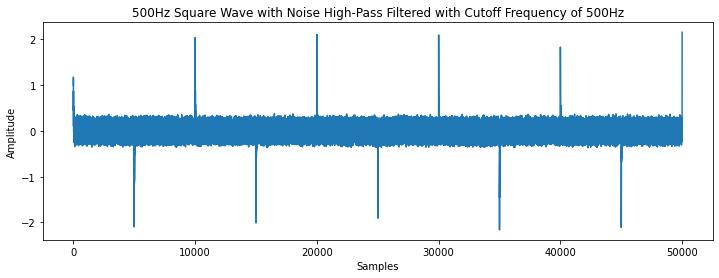

In [46]:
sq_wave_noisy_hpr= high_pass_rec(sq_wave_noisy,500,fs)

plt.figure(figsize=(12,4))
plt.title('500Hz Square Wave with Noise High-Pass Filtered with Cutoff Frequency of 500Hz')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(sq_wave_noisy_hpr)
plt.show()

(b) Apply your high-pass recursive filter to the following wave. Use a cutoff frequency of 100 Hz. Describe what happened to the wave.
       
       A=2
       f=50.0
       T=1/f
       fs=50*f
       Ts=1/fs
       cycles=3
       t=np.arange(0,cycles*T,Ts)
       i=0
       x=[0.]*len(t)
       while i < len(t):
           x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(.2*np.pi*f*t[i])+np.random.normal(0,.2)
           i+=1

In [8]:
A=2
f2=50.0
T2=1/f2
fs2=50*f2
Ts2=1/fs2
cycles=3
t2=np.arange(0,cycles*T2,Ts2)
i=0
x=[0.]*len(t2)
while i < len(t2):
    x[i]=A*np.sin(2*np.pi*f2*t2[i])+A*np.sin(.2*np.pi*f2*t2[i])+np.random.normal(0,.2)
    i+=1

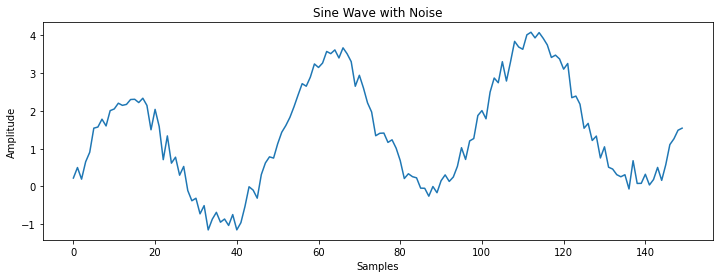

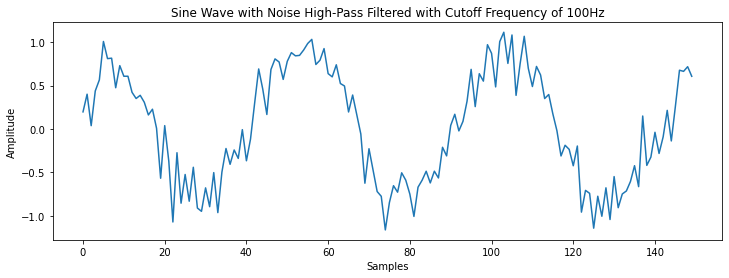

In [28]:
filtered_new_wave = high_pass_rec(x,100,fs2)

plt.figure(figsize=(12,4))
plt.title('Sine Wave with Noise')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(x)
plt.show()

plt.figure(figsize=(12,4))
plt.title('Sine Wave with Noise High-Pass Filtered with Cutoff Frequency of 100Hz')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(filtered_new_wave)
plt.show()


5.Band-pass and Band-reject filters. Apply your versions of these two filters to your CFA chord from Lab 2. Use the band-pass to pass the A and use the band-reject to reject the A. You don’t have to write out/hand in wav files, but do produce FFT graphs showing that your filters are working as intended.

In [18]:
def band_reject_rec(wave, cf, BW, fs):
    centerf = cf/fs
    bw = BW/fs
    R = 1 - 3 * bw
    K = (1-2*R*np.cos(2*np.pi*centerf)+R**2)/(2-2*np.cos(2*np.pi*centerf))
    a_0 = K
    a_1 = -2*K*np.cos(2*np.pi*centerf)
    a_2 = K
    b_1 = 2*R*np.cos(2*np.pi*centerf)
    b_2 = -R**2
    
    y = [a_0*wave[0]]
    y.append(a_0*wave[1]+a_1*wave[0]+b_1*y[0])
    i = 2
    while i < len(wave):
        y.append(a_0*wave[i]+a_1*wave[i-1]+a_2*wave[i-2]+b_1*y[i-1]+b_2*y[i-2])
        i+=1
    return y

def band_pass_rec(wave, cf, BW, fs):
    centerf = cf/fs
    bw = BW/fs
    R = 1 - 3 * bw
    K = (1-2*R*np.cos(2*np.pi*centerf)+R**2)/(2-2*np.cos(2*np.pi*centerf))
    
    a_0 = 1- K
    a_1 = 2*(K-R)*np.cos(2*np.pi*centerf)
    a_2 = R**2-K
    b_1 = 2*R*np.cos(2*np.pi*centerf)
    b_2 = -R**2
    
    y = [a_0*wave[0]]
    y.append(a_0*wave[1]+a_1*wave[0]+b_1*y[0])
    i = 2
    while i < len(wave):
        y.append(a_0*wave[i]+a_1*wave[i-1]+a_2*wave[i-2]+b_1*y[i-1]+b_2*y[i-2])
        i+=1
    return y

In [13]:

fs_CFA, chord_CFA = wavfile.read('files/chordCFA.wav')

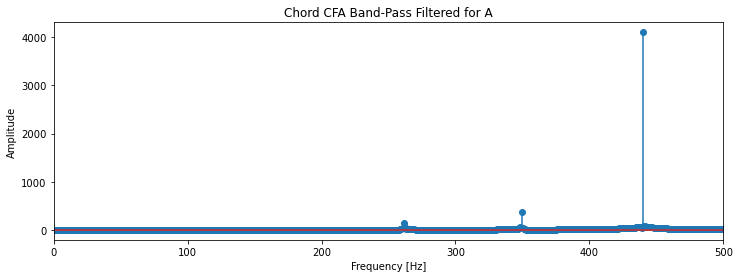

In [24]:
# A - 440.00 Hz
CFA_pass_A = band_pass_rec(chord_CFA, 440, 20, fs_CFA)
fft1 = np.fft.fft(CFA_pass_A)        # Fourier transform of the sample and hold v
N_1 = len(CFA_pass_A)              
f_1 = np.linspace(0, fs_CFA, N_1)
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title('Chord CFA Band-Pass Filtered for A')
plt.stem(f_1,np.abs(fft1)/N_1)
plt.xlim(0,500)
plt.show()

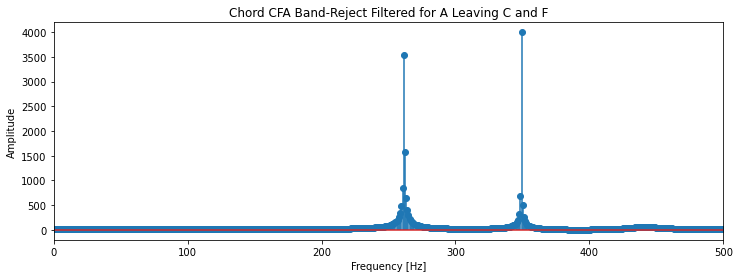

In [25]:
# C - 261.63 Hz
# F - 349.23 Hz

CFA_rej_A = band_reject_rec(chord_CFA, 440, 20, fs_CFA)
fft2 = np.fft.fft(CFA_rej_A)        # Fourier transform of the sample and hold v
N_2 = len(CFA_rej_A)              
f_2 = np.linspace(0, fs_CFA, N_2)
plt.figure(figsize=(12,4))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title('Chord CFA Band-Reject Filtered for A Leaving C and F')
plt.stem(f_2,np.abs(fft2)/N_2)
plt.xlim(0,500)
plt.show()